In [1]:
import pandas as pd

In [2]:
german = pd.read_csv('../datasets/german_transl.csv', index_col = 0)

In [3]:
pt = pd.read_csv('Final300.csv', index_col = 0)

In [4]:
pt

,Ano de Registo,Combustível,Condição,ID,Marca,Origem,Potência,Quilómetros,Segmento,Série,Tipo de Caixa
0,2013,Gasolina,Usados,8073675579,Cadillac,NaN,409,47200,SUV / TT,NaN,Automática
1,2012,Diesel,Usados,8069978966,Porsche,NaN,250,113000,Sedan,NaN,Automática
2,2013,Diesel,Usados,8068316065,Citroën,NaN,115,104000,Citadino,NaN,Manual
3,2018,Diesel,Usados,8074629399,BMW,NaN,190,35000,Sedan,Série 5,Automática
4,2018,Diesel,Usados,8075510964,Mercedes-Benz,Nacional,190,78453,Sedan,Classe E,Automática
...,...,...,...,...,...,...,...,...,...,...,...
15809,2017,Diesel,Usados,8047877369,MINI,Nacional,116,10000,Citadino,NaN,Automática
15810,2015,Gasolina,Usados,8075644442,Yamaha,NaN,200,17900,Supersport,NaN,Unknown
15811,2018,Diesel,Usados,8074969766,BMW,NaN,190,22373,Carrinha,Série 3,Automática
15812,2018,Diesel,Usados,8041049841,BMW,Nacional,190,10000,Sedan,Série 5,Automática


In [5]:
german.groupby(['brand']).agg({'horsepower': 'mean', 'km': 'mean'})

#DataFrame.groupby(self, by=None, axis=0, level=None, as_index: bool = True, sort: bool = True, group_keys: bool = True, squeeze: bool = False, observed: bool = False) 

,horsepower,km
brand,,
alfa_romeo,142.248207,125885.939742
audi,167.005675,125349.427918
bmw,174.861313,130611.090504
chevrolet,142.832309,96931.518876
chrysler,168.044025,133597.484277
citroen,96.860142,116716.731266
dacia,87.570978,84605.678233
daewoo,82.070248,121632.231405
daihatsu,68.444717,116179.361179


In [6]:
dict_transm = {'automatic' : 1, 'manual': 0}

In [7]:
german['transmission'] = german['transmission'].map(dict_transm)

german['transmission'].value_counts()

0    169670
1     53726
Name: transmission, dtype: int64

In [8]:
german.groupby(['brand','fuel_type'])

In [9]:
gas = german.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'gas')})
diesel = german.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'diesel')})
electric = german.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'electric')})
GPL = german.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'GPL')})
hybrid = german.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'hybrid')})
CNG = german.groupby(['year']).agg({'fuel_type': lambda x : sum(x == 'CNG')})

#fuel_type_df = pd.concat([gas, diesel] axis = 0)
fuel_type_df = pd.concat([gas, diesel, electric, GPL, hybrid, CNG], keys=['gas', 'diesel', 'electric', 'GPL', 'hybrid', 'CNG'], axis = 1)

In [10]:
#df.count()

fuel_type_df['year_total'] = fuel_type_df.sum(axis=1)




In [11]:
fuel_type_ratios = fuel_type_df.loc[:,"gas":"CNG"].div(fuel_type_df["year_total"], axis=0)

#fuel_type_df['gas_ratio'] = fuel_type_df['gas'] / fuel_type_df['year_total']

#fuel_type_df

#for c in fuel_type_df:
#3    c = c/fuel_type_df['year_total']

In [85]:
fuel_type_ratios.to_csv('fuel_type_ratios')

,gas,diesel,electric,GPL,hybrid,CNG
year,,,,,,
1967,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1968,0.968254,0.031746,0.000000,0.000000,0.000000,0.000000
1969,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1970,0.973684,0.026316,0.000000,0.000000,0.000000,0.000000
1971,0.920455,0.068182,0.000000,0.011364,0.000000,0.000000
1972,0.975000,0.016667,0.000000,0.008333,0.000000,0.000000
1973,0.968421,0.010526,0.000000,0.021053,0.000000,0.000000
1974,0.937500,0.044643,0.000000,0.017857,0.000000,0.000000
1975,0.946429,0.053571,0.000000,0.000000,0.000000,0.000000


In [13]:
fuel_type_ratios.columns = fuel_type_ratios.columns.get_level_values(0)


In [14]:
fuel_type_ratios.index

Int64Index([1923, 1930, 1931, 1932, 1934, 1936, 1937, 1938, 1939, 1941, 1942,
            1943, 1945, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
            1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
            1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
            1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
            1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
            2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year')

In [83]:
import seaborn as sns

In [84]:
sns.set(palette = 'Pastel1')

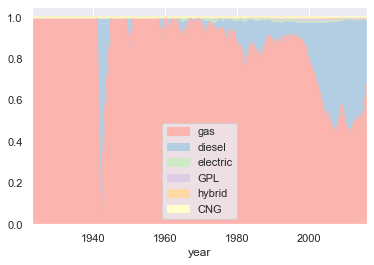

In [78]:
fuel_type_ratios.plot.area().get_figure().savefig("stacked_histogram_fuel_type.png")
#list_data = [fuel_type_ratios.loc[:"diesel", "a"], wide_df.loc["2003":, "b"]]
#ax = sns.lineplot(data=list_data)

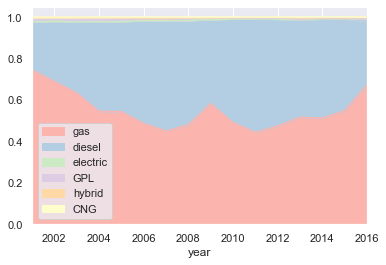

In [79]:
plots = fuel_type_ratios[fuel_type_ratios.index > 2000].plot.area().get_figure().savefig("stacked_histogram_zoom2000_fuel_type.png")

KeyboardInterrupt: 

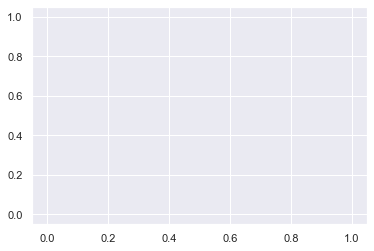

In [82]:
sns.lineplot(data = german['horsepower'])